<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/JulyLeetCodePart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

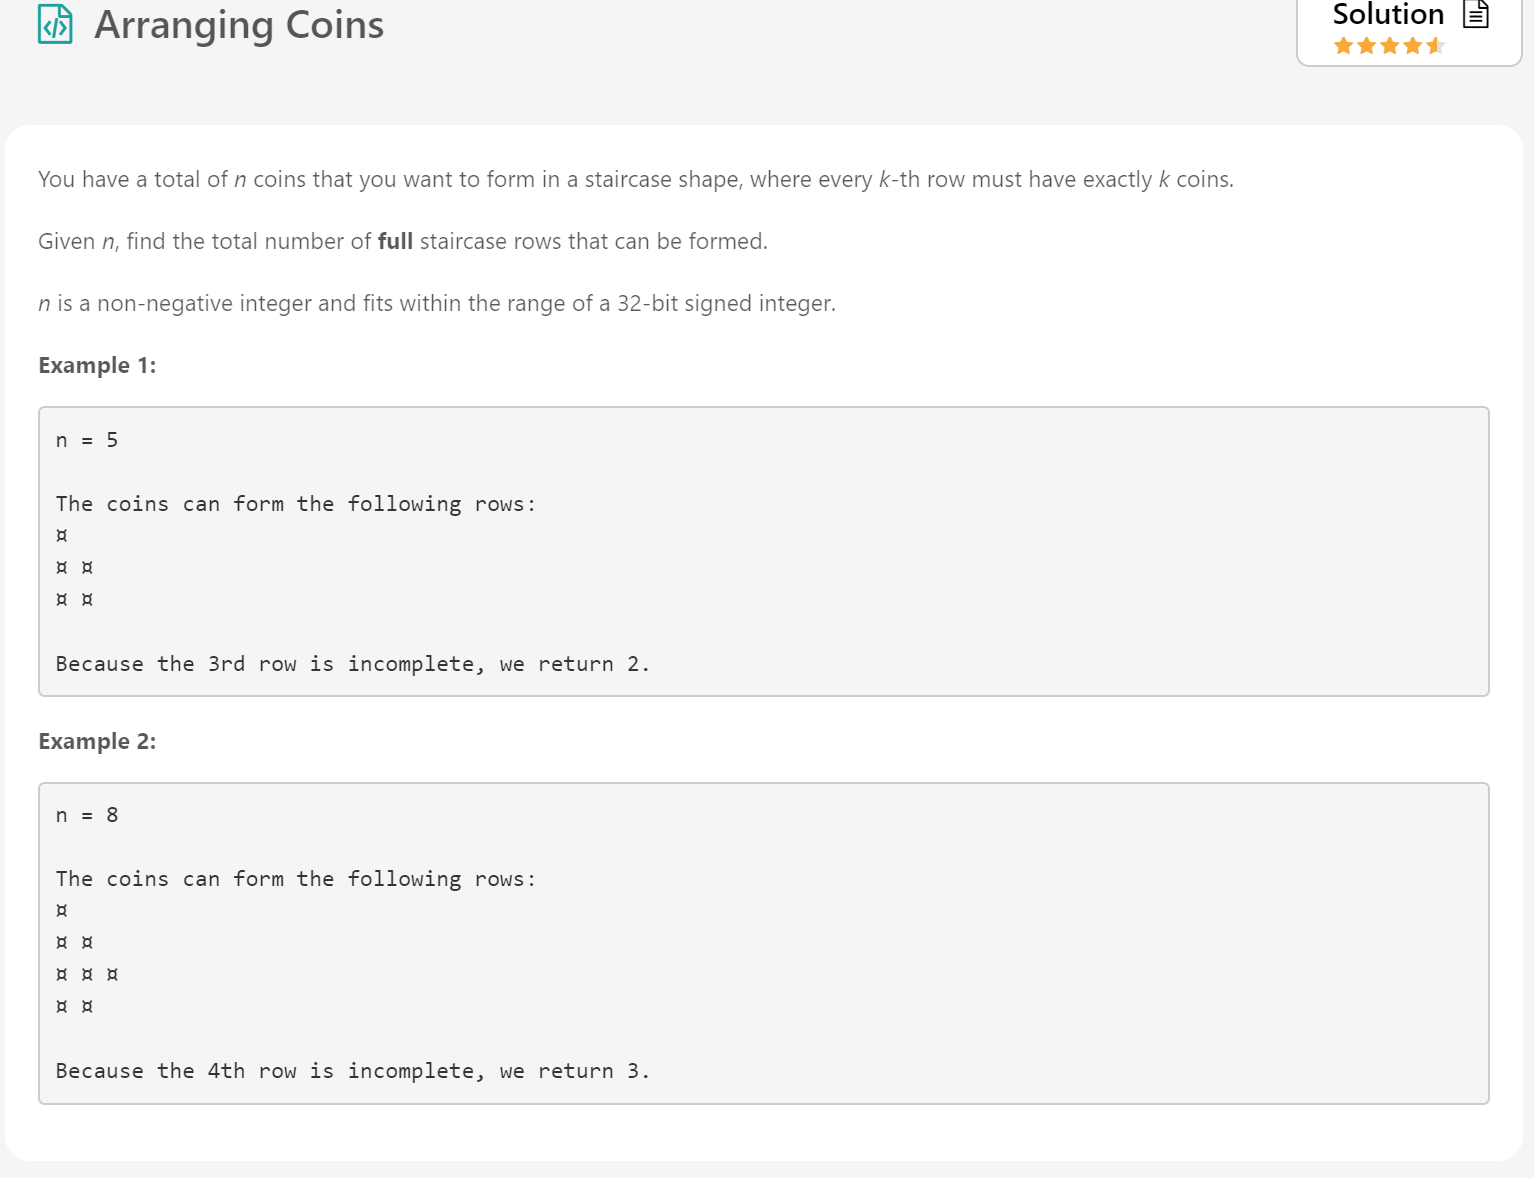

In [ ]:
''' July 1st Arranging coins
Should have used binary search appoarch 
'''
# solution : https://leetcode.com/articles/arranging-coins/

# quite dump solution 
class Solution:
    def arrangeCoins(self, n: int) -> int:
        total = n
        for i in range(0,n+1):
            total = total - i
            if total < 0:
                return i-1
            
        return 0 if n==0 else 1 

# fastest solution
class Solution:
    def arrangeCoins(self, n: int) -> int:
        l, r = 1, 65536
        while l < r:
            mid = (l + r) >> 1
            if mid * (mid + 1) // 2 <= n:
                l = mid + 1
            else:
                r = mid
        return l - 1


# 1 line solution 
class Solution:
    def arrangeCoins(self, n: int) -> int:
        return int((-1 + sqrt(1 + 8*n)) // 2)


# 1 line solution 
class Solution:
    def arrangeCoins(self, n: int) -> int:
        return floor((-1+sqrt(1+8*n))/2)
  


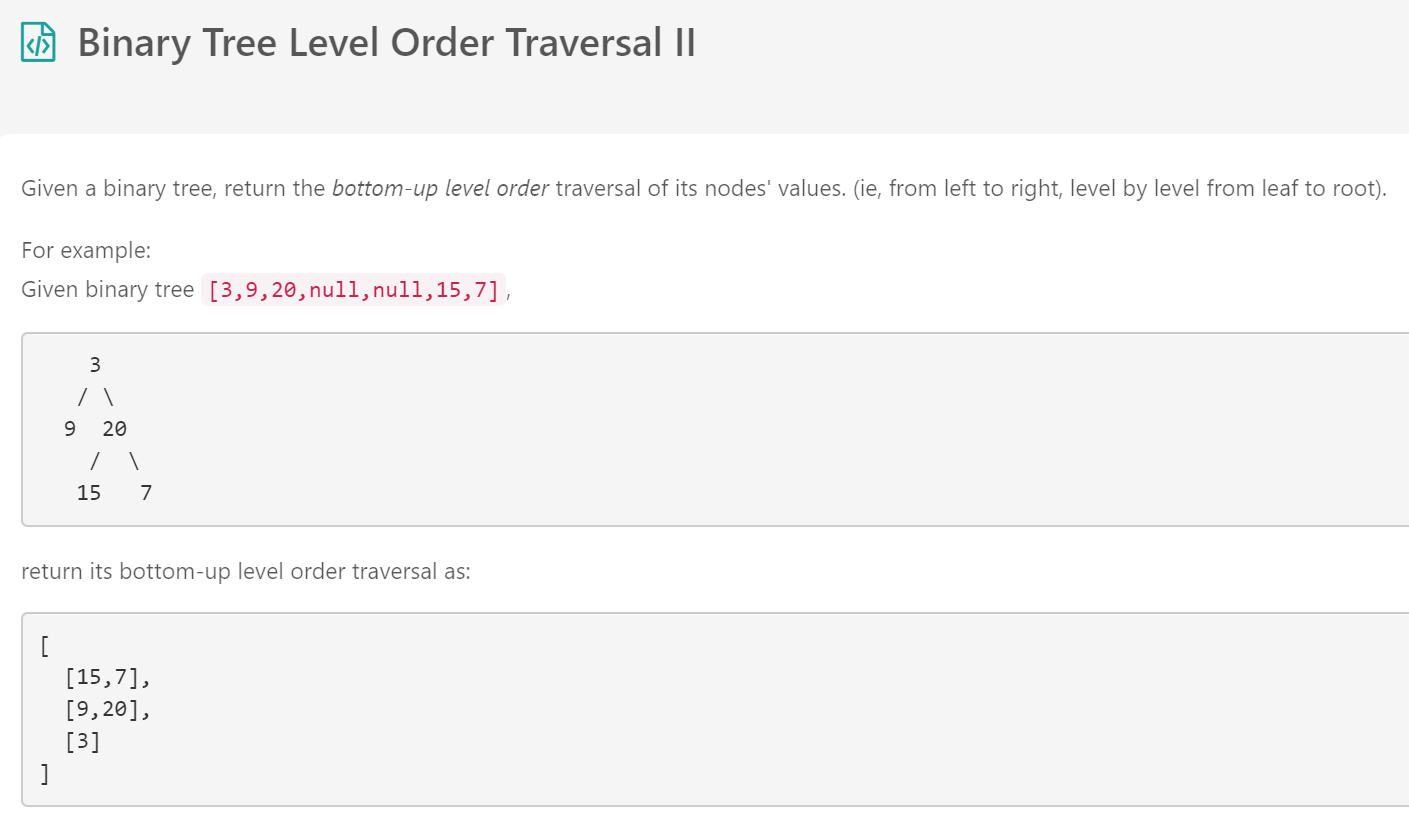

In [ ]:
''' July 2nd my solution using bfs
'''
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def levelOrderBottom(self, root: TreeNode) -> List[List[int]]:
        dic = {}
        layer = 0
        
        def bfs(node : TreeNode, layer :int):
            if not node:
                return
            if layer in dic:
                dic[layer] += [node.val]
            else:
                dic[layer] = [node.val]
                
            if node.left:
                bfs(node.left,layer + 1)
            if node.right:
                bfs(node.right,layer + 1)
                
        bfs(root,layer)
        
        return reversed(list(dic.values()))

### fastest solution , same idea

class Solution:
    def levelOrderBottom(self, root: TreeNode) -> List[List[int]]:
        levels = [] # len of leves is the same as layer number
        if not root:
            return levels
        
        def helper(node,level):
            
            if len(levels)==level: 
                levels.append([]) # append new layer
            
            levels[level].append(node.val) # layer append new values
            
            if node.left: helper(node.left, level+1)
            if node.right: helper(node.right, level+1)
        
        helper(root,0)
        return levels[::-1]  # reversed list


### 2nd fastest solution using while loop , Stack
class Solution:
    def levelOrderBottom(self, root: TreeNode) -> List[List[int]]:
        res = []
        queue = []
        
        queue.append(root)
        
        while queue:
            level = []
            size = len(queue)
            
            #node = queue.pop(0)
            #print(queue)
            for _ in range(size):    
                node = queue.pop(0)
                if node is not None:
                    level.append(node.val)
                    queue.append(node.left)
                    queue.append(node.right)
            if level != []:
                res.insert(0, level)
                
            
        return res

In [ ]:
# Summary 3 approaches
# 1. dfs recursively
def levelOrderBottom1(self, root):
    res = []
    self.dfs(root, 0, res)
    return res

def dfs(self, root, level, res):
    if root:
        if len(res) < level + 1:
            res.insert(0, [])
        res[-(level+1)].append(root.val)
        self.dfs(root.left, level+1, res)
        self.dfs(root.right, level+1, res)
        
# 2. dfs + stack
def levelOrderBottom2(self, root):
    stack = [(root, 0)]
    res = []
    while stack:
        node, level = stack.pop()
        if node:
            if len(res) < level+1:
                res.insert(0, [])
            res[-(level+1)].append(node.val)
            stack.append((node.right, level+1))
            stack.append((node.left, level+1))
    return res
 
# 3. bfs + queue   
def levelOrderBottom(self, root):
    queue, res = collections.deque([(root, 0)]), []
    while queue:
        node, level = queue.popleft()
        if node:
            if len(res) < level+1:
                res.insert(0, [])
            res[-(level+1)].append(node.val)
            queue.append((node.left, level+1))
            queue.append((node.right, level+1))
    return res

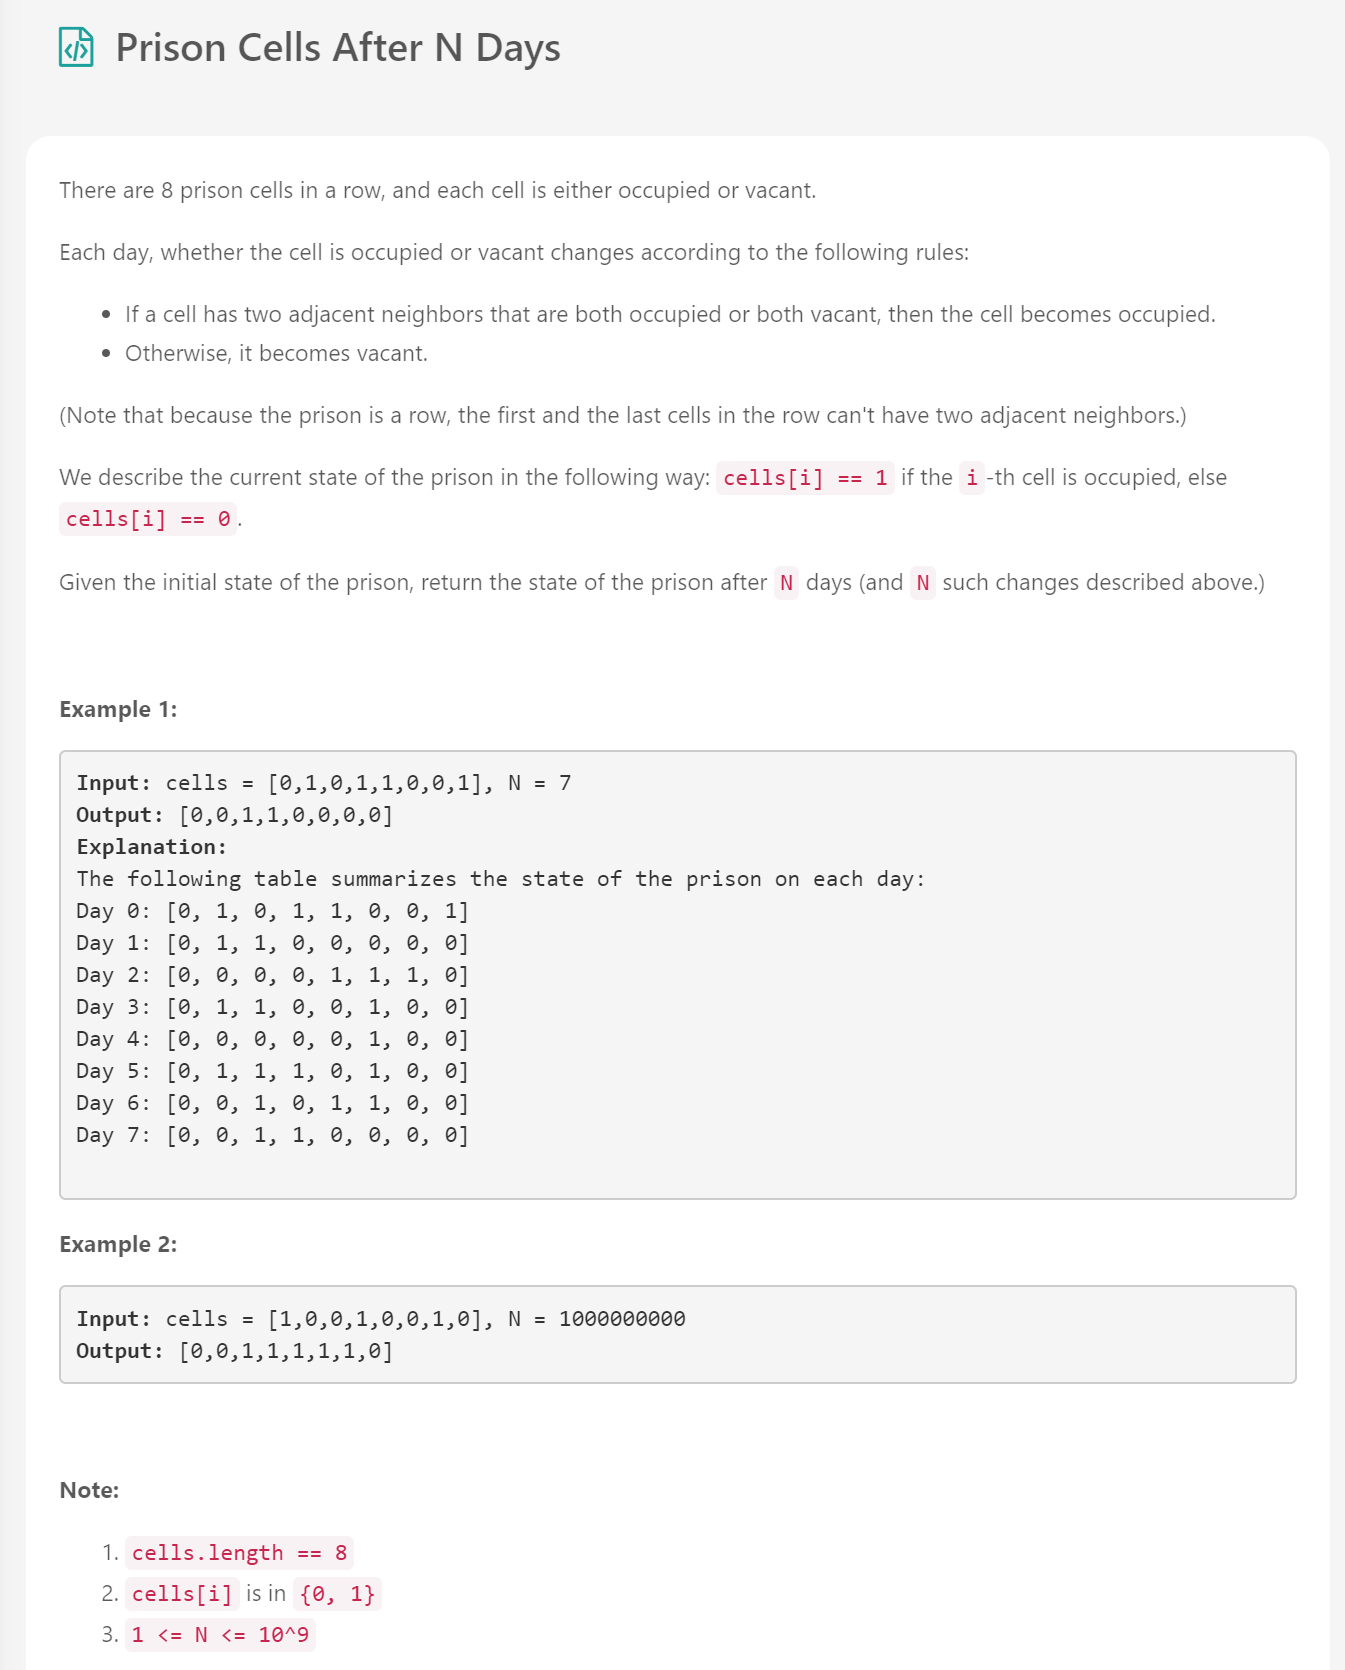

In [ ]:
'''July 3rd Prison Cells After N Days
There are 8 prison cells in a row, and each cell is either occupied or vacant.
Each day, whether the cell is occupied or vacant changes according to the following rules:

If a cell has two adjacent neighbors that are both occupied or both vacant, then the cell becomes occupied.
Otherwise, it becomes vacant.
(Note that because the prison is a row, the first and the last cells in the row can't have two adjacent neighbors.)

We describe the current state of the prison in the following way: cells[i] == 1 if the i-th cell is occupied, else cells[i] == 0.
Given the initial state of the prison, return the state of the prison after N days (and N such changes described above.)

Ex1
Input: cells = [0,1,0,1,1,0,0,1], N = 7
Output: [0,0,1,1,0,0,0,0]
Explanation: 
The following table summarizes the state of the prison on each day:
Day 0: [0, 1, 0, 1, 1, 0, 0, 1]
Day 1: [0, 1, 1, 0, 0, 0, 0, 0]
Day 2: [0, 0, 0, 0, 1, 1, 1, 0]
Day 3: [0, 1, 1, 0, 0, 1, 0, 0]
Day 4: [0, 0, 0, 0, 0, 1, 0, 0]
Day 5: [0, 1, 1, 1, 0, 1, 0, 0]
Day 6: [0, 0, 1, 0, 1, 1, 0, 0]
Day 7: [0, 0, 1, 1, 0, 0, 0, 0]


Ex2:
Input: cells = [1,0,0,1,0,0,1,0], N = 1000000000
Output: [0,0,1,1,1,1,1,0]
'''

### Time limit exceeded for the example 2. 
class Solution:
    def prisonAfterNDays(self, cells: List[int], N: int) -> List[int]:
        
        for i in range(N):
            dummy = [0 for x in range(len(cells))]
            for j in range(len(cells)):
                if j == 0 or j == len(cells)-1:
                    dummy[j] = 0
                else:
                    if cells[j-1] == cells[j+1]:
                        dummy[j]= 1
                    else:
                        dummy[j]= 0
            cells = dummy
   
        return cells

### still time limit exceed
class Solution:
    def prisonAfterNDays(self, cells: List[int], N: int) -> List[int]:
        
        for i in range(N):
            cells = [0]  + [ 1 if a == b else 0 for a,b in zip(cells[:-2],cells[2:])] +  [0]
            

        return cells   


In [ ]:
# https://leetcode.com/problems/prison-cells-after-n-days/
# There are 8 prison cells in a row, and each cell is either occupied or vacant.
# Each day, whether the cell is occupied or vacant
# changes according to the following rules:
# If a cell has two adjacent neighbors that are both occupied
# or both vacant, then the cell becomes occupied.
# Otherwise, it becomes vacant.
# Note that because the prison is a row, the first and the
# last cells in the row can't have two adjacent neighbors.
# We describe the current state of the prison in the following
# way: cells[i] == 1 if the i-th cell is occupied,
# else cells[i] == 0.
# Given the initial state of the prison, return the state
# of the prison after N days and N such changes.

# For 8 cells, the ends are vacant after the first day
# so there are at most 2**6 = 64 possible states.
# After at most 64 days there will be a cycle in the pattern
# of cells. Evolve the cells until a repeated state is
# found. Subtract as many cycles as possible from the
# remaining days, then evolve to the final state.
# Time - O(1)
# Space - O(1)

class Solution(object):
def prisonAfterNDays(self, cells, N):
    """
    :type cells: List[int]
    :type N: int
    :rtype: List[int]
    """
    day = 0
    state = tuple(cells) # state can be a dict key
    state_to_day = {}

    def next_state(state):
      return tuple([0] + [int(not (state[i - 1] ^ state[i + 1])) for i in range(1, 7)] + [0])

    while day < N and state not in state_to_day: # until cycle in states
      state_to_day[state] = day
      day += 1
      state = next_state(state)

    if day < N:
      cycle = day - state_to_day[state]
      remaining = (N - state_to_day[state]) % cycle
      for _ in range(remaining):
        state = next_state(state)

    return list(state)

### fastest soluton 
class Solution:
    def prisonAfterNDays(self, cells: List[int], N: int) -> List[int]:
        if not N:
            return cells
        
        while N:
            state = cells.copy()
            for i in range(len(cells)):
                if i == 0 or i == len(state) - 1:
                    cells[i] = 0
                else:
                    if state[i-1] == state[i+1]:
                        cells[i] = 1
                    else:
                        cells[i] = 0
            N = (N-1) % 14
        return cells
    
        '''
        first = True
        while(N):
            tempList = [0]*8
            if first:
                tempList[7] = 0
                tempList[0] = 0
                first = False
            for i in range(1,7):
                if (cells[i-1] and cells[i+1]) or (not (cells[i-1] or cells[i+1])):
                    tempList[i] = 1

            cells = tempList
            N -= 1
        
        return cells
        '''
### 2nd fastest

class Solution:
    def prisonAfterNDays(self, cells: List[int], N: int) -> List[int]:
        #pre = cells
       
        def findNext(pre):
            curr = [0] * len(cells)
            curr[0] = 0
            for j in range(1, len(cells)-1):
                #print(pre[j-1], pre[j+1])
                if pre[j-1] != pre[j+1]:
                    curr[j] = 0
                else:
                    curr[j] = 1
            curr[len(cells)-1] = 0
            return curr
       
        cycle = []
        state = findNext(cells)
        while state not in cycle:
            cycle.append(state)
            state = findNext(state)
           
        return cycle[(N - 1)%len(cycle)]            

# Discussion link: https://leetcode.com/explore/featured/card/july-leetcoding-challenge/544/week-1-july-1st-july-7th/3379/discuss/205684/JavaPython-Find-the-Loop-or-Mod-14

There must be a pattern in this problem. The length of the list is 8, and the first and last element of list will always be 0. So only 8-2= 6 items in the list will change. For each item, there are 2 possible values : 0 or 1. So the entile possible cell states will be less or equal to` 2**6 = 64.`

```
0 [0, 1, 0, 1, 1, 0, 0, 1]
----------------------------------------
1 [0, 1, 1, 0, 0, 0, 0, 0]
2 [0, 0, 0, 0, 1, 1, 1, 0]
3 [0, 1, 1, 0, 0, 1, 0, 0]
4 [0, 0, 0, 0, 0, 1, 0, 0]
5 [0, 1, 1, 1, 0, 1, 0, 0]
6 [0, 0, 1, 0, 1, 1, 0, 0]
7 [0, 0, 1, 1, 0, 0, 0, 0]
8 [0, 0, 0, 0, 0, 1, 1, 0]
9 [0, 1, 1, 1, 0, 0, 0, 0]
10 [0, 0, 1, 0, 0, 1, 1, 0]
11 [0, 0, 1, 0, 0, 0, 0, 0]
12 [0, 0, 1, 0, 1, 1, 1, 0]
13 [0, 0, 1, 1, 0, 1, 0, 0]
14 [0, 0, 0, 0, 1, 1, 0, 0]
----------------------------------------
15 [0, 1, 1, 0, 0, 0, 0, 0]
16 [0, 0, 0, 0, 1, 1, 1, 0]
17 [0, 1, 1, 0, 0, 1, 0, 0]
18 [0, 0, 0, 0, 0, 1, 0, 0]
19 [0, 1, 1, 1, 0, 1, 0, 0]
20 [0, 0, 1, 0, 1, 1, 0, 0]
21 [0, 0, 1, 1, 0, 0, 0, 0]
22 [0, 0, 0, 0, 0, 1, 1, 0]
23 [0, 1, 1, 1, 0, 0, 0, 0]
24 [0, 0, 1, 0, 0, 1, 1, 0]
25 [0, 0, 1, 0, 0, 0, 0, 0]
26 [0, 0, 1, 0, 1, 1, 1, 0]
27 [0, 0, 1, 1, 0, 1, 0, 0]
28 [0, 0, 0, 0, 1, 1, 0, 0]
----------------------------------------
```


To calculate the next day prison states:

```
# the first and last cells will alwasy be zero according to the condition
def nextday(cells):
            next_day_cells = [0] *len(cells)
            for i in range(1,len(cells)-1):
                if cells[i-1] == cells[i+1]: 
                        next_day_cells[i] = 1
                else:
                        next_day_cells[i] = 0
            return tuple(next_day_cells)
```


   
From the results, we know that the length of the pattern will be 14. i.e. the length of pattern == 14.


```
Seen =
{(0, 1, 1, 0, 0, 0, 0, 0): 1,
(0, 0, 0, 0, 1, 1, 1, 0): 2,
(0, 1, 1, 0, 0, 1, 0, 0): 3,
(0, 0, 0, 0, 0, 1, 0, 0): 4,
(0, 1, 1, 1, 0, 1, 0, 0): 5, 
(0, 0, 1, 0, 1, 1, 0, 0): 6, 
(0, 0, 1, 1, 0, 0, 0, 0): 7,
(0, 0, 0, 0, 0, 1, 1, 0): 8, 
(0, 1, 1, 1, 0, 0, 0, 0): 9, 
(0, 0, 1, 0, 0, 1, 1, 0): 10, 
(0, 0, 1, 0, 0, 0, 0, 0): 11, 
(0, 0, 1, 0, 1, 1, 1, 0): 12,
(0, 0, 1, 1, 0, 1, 0, 0): 13, 
(0, 0, 0, 0, 1, 1, 0, 0): 14}
```


In [ ]:
# Code
class Solution:
    def prisonAfterNDays(self, cells: List[int], N: int) -> List[int]:
        def nextday(cells):
            next_day_cells = [0] *len(cells)
            for i in range(1,len(cells)-1):
                if cells[i-1] == cells[i+1]: 
                        next_day_cells[i] = 1
                else:
                        next_day_cells[i] = 0
            return next_day_cells
        
        seen = {}
        while N > 0:
            c = tuple(cells)
            if c in seen:
                N %= seen[c] - N
            seen[c] = N

            if N >= 1:
                N -= 1
                cells = nextday(cells)

        return cells

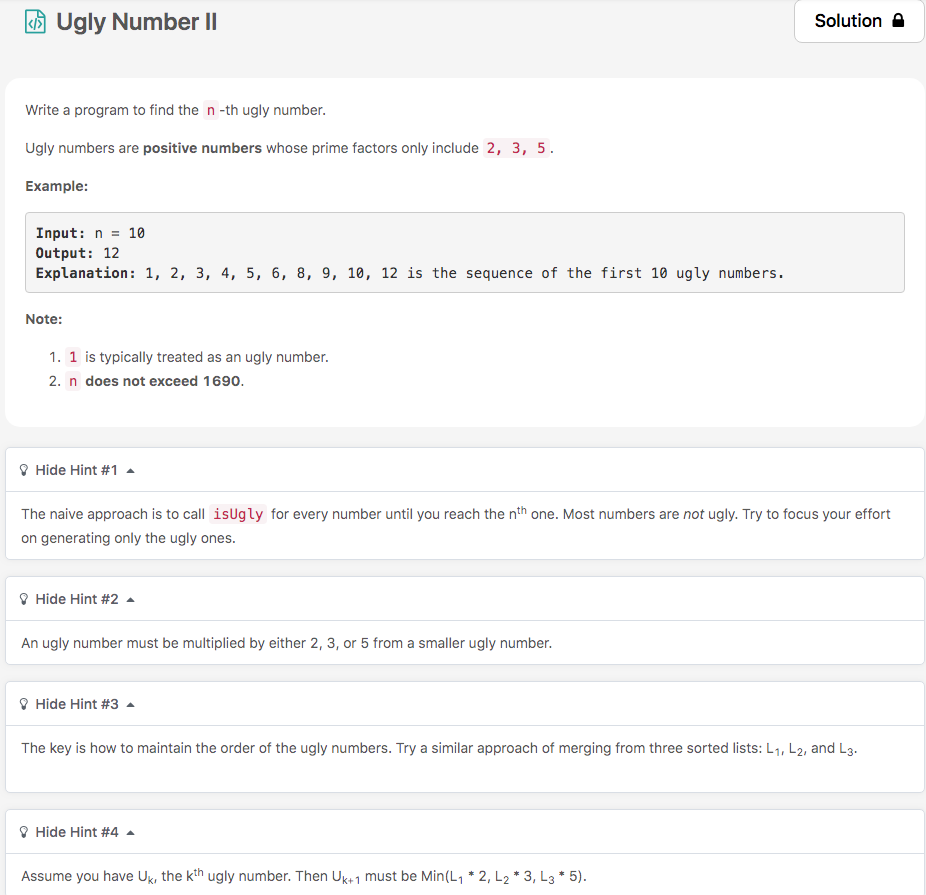

In [ ]:
''' July 4th Ugly Number II '''
# my solution. 
class Solution:
    def nthUglyNumber(self, n: int) -> int:
        #Appoarch 1: Using MinHeap
        from heapq import heapify, heappush, heappop 
        # empty heap, pushing operation in minheap, automatically has order. 
        heap = [1]
        heapify(heap)
        memo = set()        
        
        for i in range(n):
            #print(heap)
            ext = heappop(heap)
            
            if ext*2 not in memo:
                heappush(heap, ext*2)
                memo.add(ext*2)
            if ext*3 not in memo:
                heappush(heap, ext*3)
                memo.add(ext*3)
            if ext*5 not in memo:
                heappush(heap, ext*5)
                memo.add(ext*5)  
                
        return ext


# Dynamic Programming 
# source : https://medium.com/@interviewprep/ugly-number-dynamic-programming-94520110a084

"""
1*2, 2*2, 3*2, 4*2, ...
1*3, 2*3, 3*3, 4*3, ...
1*5, 2*5, 3*5, 4*5, ...

we take the elements in order of -
1*2, 1*3, 2*2, 1*5, 2*3, 3*3, 2*5, ...
""""

'''Dynamic Programming Approach'''
def getNthUglyNo(n):
    dp=[0]*n
    dp[0]=1
    l2=l3=l5=0
    multiple_2=2
    multiple_3=3
    multiple_5=5
    for i in range(1,n):
        dp[i]=min(multiple_2,multiple_3,multiple_5)
        
        if dp[i]==multiple_2:
            l2+=1
            multiple_2=dp[l2]*2
        if dp[i]==multiple_3:
            l3+=1
            multiple_3=dp[l3]*3
        if dp[i]==multiple_5:
            l5+=1
            multiple_5=dp[l5]*5
            
    return dp[-1]



# Why is this not working 
# It was because the algorithm was wrong here. The pointers here are increasing, but 
# actually we need to use the elements within the array, so we should fix its as below
# p2,p3, p5 = 0,0,0
# when multiply then p2*2, p3*3, p4*4 -> arr[p2] * 2, arr[p3] *3, arr[p5] *5
class Solution:
    def nthUglyNumber(self, n: int) -> int:
        p2, p3, p5 = 1,1,1
        arr = [1]

        while len(arr) < n+1:
            print(arr, p2, p3, p5) 
            if p2*2 == min(p2*2,p3*3,p5*5):
                if p2*2 not in arr:
                    arr.append(p2*2)
                p2 += 1
                continue
                
            if p3*3 == min(p2*2,p3*3,p5*5):
                if p3*3 not in arr:         
                    arr.append(p3*3)
                p3 += 1     
                continue
                
            if p5*5 == min(p2*2,p3*3,p5*5): 
                if p5*5 not in arr:         
                    arr.append(p5*5)
                p5 += 1 
                continue
            
        return arr[-1]


# Fastest solution 

from heapq import heappop, heappush
class Ugly:
    def __init__(self):
        seen = {1, }
        self.nums = nums = []
        heap = []
        heappush(heap, 1)

        for _ in range(1690):
            curr_ugly = heappop(heap)
            nums.append(curr_ugly)
            for i in [2, 3, 5]:
                new_ugly = curr_ugly * i
                if new_ugly not in seen:
                    seen.add(new_ugly)
                    heappush(heap, new_ugly)
    
class Solution:
    u = Ugly()
    def nthUglyNumber(self, n):
        return self.u.nums[n - 1]




# 2nd fastest answer
class Ugly:
    
    def __init__(self):
        self.a = self.calc_ugly_numbers(1690)
    
    def calc_ugly_numbers(self, n):
        arr = [1]
        p2, p3, p5 = 0, 0, 0

        while len(arr) != n:
            mini = min(arr[p2]*2, arr[p3]*3, arr[p5]*5)
            arr.append(mini)
            
            if mini == arr[p2]*2:
                p2 += 1
            if mini == arr[p3]*3:
                p3 += 1
            if mini == arr[p5]*5:
                p5 += 1
            
        return arr
    
    def get_nth(self, n):
        return self.a[n - 1]


class Solution:

    u = Ugly()

    def nthUglyNumber(self, n: int) -> int:
        
        if n <= 0:
            return
        elif n == 1:
            return 1
    
        return self.u.get_nth(n)

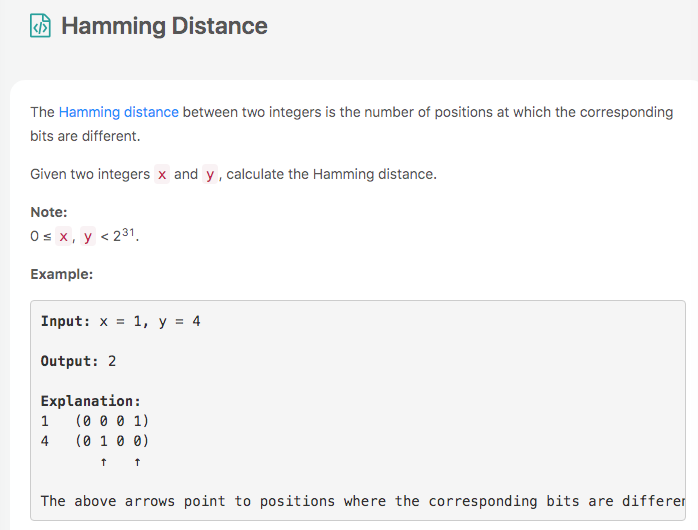

In [ ]:
''' July 5th  Hamming Distance
The Hamming distance between two integers is the number of positions at which the corresponding bits are different.

Given two integers x and y, calculate the Hamming distance.

Note:
0 ≤ x, y < 231.

Example:

Input: x = 1, y = 4

Output: 2

Explanation:
1   (0 0 0 1)
4   (0 1 0 0)
       ↑   ↑

The above arrows point to positions where the corresponding bits are different.

'''
# Straight forward, but slow
class Solution:
    def hammingDistance(self, x: int, y: int) -> int:
        #bin_x = format(x,'08b')
        #bin_y = format(y,'08b')         
        bin_x = bin(x)[2:]
        bin_y = bin(y)[2:]
        max_len, count = 0,0
        
        if x > y : 
            max_len = len(bin_x)
            bin_y = '0'*(max_len - len(bin_y)) + bin_y
        elif y > x:
            max_len = len(bin_y)
            bin_x = '0'*(max_len - len(bin_x)) + bin_x
        else:
            return 0
        
        for i in range(max_len):
            if bin_x[i] != bin_y[i]:
                count += 1
    
        return count 
''' Algorithm
Iterate over the bits of x and y together. If least significant bits are different,
then increment result. Right shift to move to next bit, until both integers are zero
Time - 0(log n)
Space - 0(1)
'''
class Solution:
    def hammingDistance(self, x: int, y: int) -> int:
      hamming = 0
      while x or y:
        # print('x = ', bin(x)[2:], ', y = ', bin(y)[2:])
        # print('x & 1 = ',x & 1,' y & 1 = ', y & 1)
        hamming += (x & 1) != (y & 1)
        x >>= 1
        y >>= 1
      return hamming

''' Output examples
x = 22, y = 31

Output: 
x =  10110 , y =  11111
x & 1 =  0  y & 1 =  1

x =  1011 , y =  1111
x & 1 =  1  y & 1 =  1

x =  101 , y =  111
x & 1 =  1  y & 1 =  1

x =  10 , y =  11
x & 1 =  0  y & 1 =  1

x =  1 , y =  1
x & 1 =  1  y & 1 =  1

'''


# fastest solution 

class Solution:
    def hammingDistance(self, x: int, y: int) -> int:
        numDifferences = 0
        while(x > 0 or y > 0):
            if (x & 0x01) != (y & 0x01):
                numDifferences += 1
            x >>= 1
            y >>= 1
        return numDifferences     


# 2nd fastest solution using XOR Sets each bit to 1 if only one of two bits is 1
# then count the '1', different bits. 
import math
class Solution:
    def hammingDistance(self, x: int, y: int) -> int:
        if x==y:
            return 0
        else:
            z = x^y
            z = bin(z)
            return z.count('1') 

In [ ]:
'''July 6th Plus One

Given a non-empty array of digits representing a non-negative integer, plus one to the integer.
The digits are stored such that the most significant digit is at the head of the list, and each element in the array contain a single digit.
You may assume the integer does not contain any leading zero, except the number 0 itself.

Example 1:
Input: [1,2,3]
Output: [1,2,4]
Explanation: The array represents the integer 123.

Example 2:
Input: [4,3,2,1]
Output: [4,3,2,2]
Explanation: The array represents the integer 4321'''

# my solution, modify array in place 24ms, top 3

class Solution:
    def plusOne(self, digits: List[int]) -> List[int]:
        mem = 1
        
        for i in range(len(digits)-1, -1,-1):
            if digits[i] + mem >= 10:
                digits[i] = digits[i] - 9
                mem = 1
            else:
                digits[i] = digits[i] + mem
                mem = 0  # should break here when mem = 0
            
        return digits if mem == 0 else [1]+digits


# fastest solution 12ms
# same idea
class Solution:
    def plusOne(self, digits: List[int]) -> List[int]:
        for i in range(0, len(digits)):
            idx = -1 + (-1 * i) # also iterate backward but has break if val < 10 ***
            val = digits[idx] + 1
            if val < 10:
                digits[idx] = val
                break
            if val == 10:
                digits[idx] = 0
                if i == (len(digits) - 1):
                    digits =  [1] + digits[:]
            
        return digits

# convert to integer then convert again 
class Solution:
    def plusOne(self, digits: List[int]) -> List[int]:
        num = 1
        for idx, x in enumerate(digits[::-1]):
            num += (x*10**idx)
        return list(str(num))


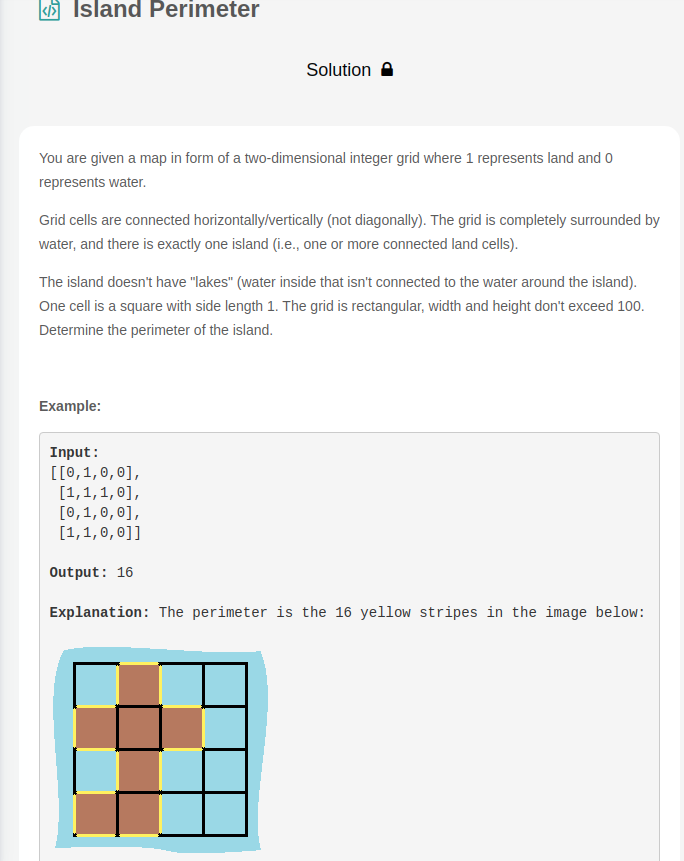![

In [ ]:
''' July 7th island perimeter '''
# https://leetcode.com/problems/island-perimeter/
# You are given a map in form of a two-dimensional integer
# grid where 1 represents land and 0 represents water.
# Grid cells are connected horizontally/vertically (not diagonally).
# The grid is completely surrounded by water,
# and there is exactly one island (i.e., one or more connected
# land cells). The island doesn't have "lakes" (water
# inside that isn't connected to the water around the island).
# One cell is a square with side length 1. The grid
# is rectangular, width and height don't exceed
# 100. Determine the perimeter of the island.

# Iterate over grid. If a cell is land, add 4 to perimeter assuming
# cell is surrounded by water. Then for each of lower
# and right cells that are land, decrement the perimeter
# by 2 (both sides of the internal edge).
# Time - O(mn)
# Space - O(mn)

class Solution(object):
def islandPerimeter(self, grid):
    """
    :type grid: List[List[int]]
    :rtype: int
    """
    len_y, len_x = len(grid), len(grid[0])
    # pad with 0 to the side
    for row in grid: 
        row.append(0)
    # pad with 0 to the bottom
    grid.append([0] * (len_x + 1))
    perimiter = 0

    for y in range(len_y):
        for x in range(len_x):
            if grid[y][x] == 1:
                perimiter += 4
                if grid[y + 1][x] == 1:
                    perimiter -= 2
                if grid[y][x + 1] == 1:
                    perimiter -= 2

    return perimiter 

# reference: https://leetcode.com/explore/featured/card/july-leetcoding-challenge/544/week-1-july-1st-july-7th/3383/discuss/723842/Python-O(mn)-simple-loop-solution-explained

# fastest solution, same algorithm 
class Solution:
    def islandPerimeter(self, grid: List[List[int]]) -> int:
        rows = len(grid)
        cols = len(grid[0])
        
        result = 0
     
        for r in range(rows):
            for c in range(cols):
                if grid[r][c] == 1:
                    result += 4
                    
                    if r > 0 and grid[r-1][c] == 1:
                        result -= 2
                        
                    if c > 0 and grid[r][c-1] == 1:
                        result -= 2
        
        return result

# brief solution 
class Solution:
    def islandPerimeter(self, grid: List[List[int]]) -> int:
        maxr, maxc = len(grid), len(grid[0])
        count, conn = 0, 0
        for i in range(maxr):
            for j in range(maxc):
                if grid[i][j] == 1:
                    count += 1
                    if i > 0 and grid[i-1][j] == 1:
                        conn += 1
                    if j > 0 and grid[i][j-1] == 1:
                        conn += 1
        return (count * 4) - (2 * conn)

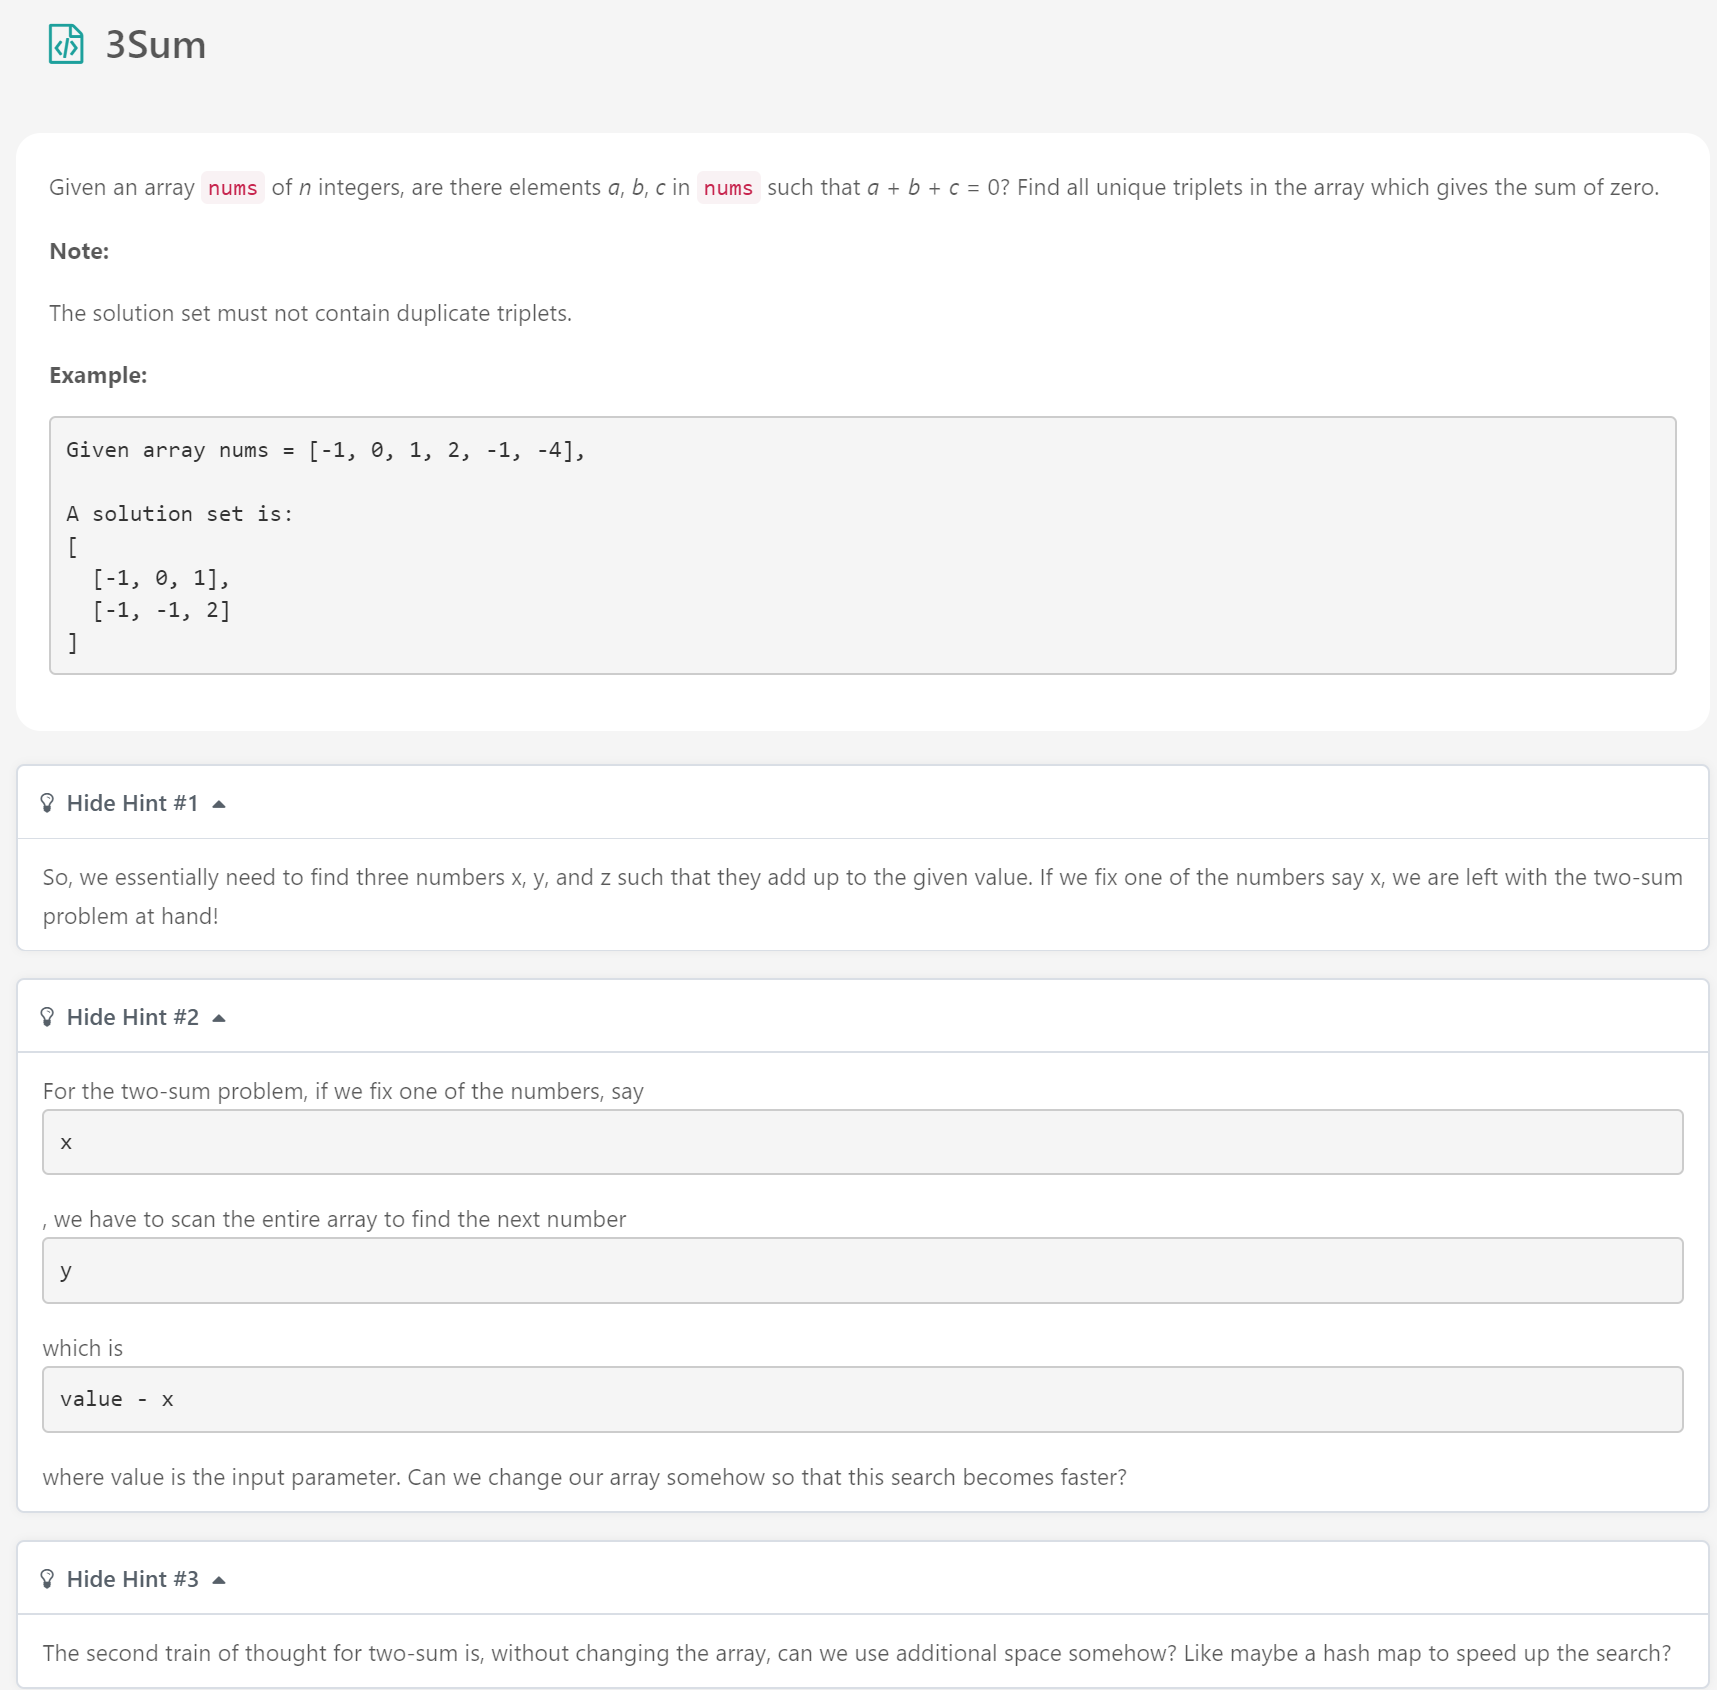

In [ ]:
''' 3Sum July 8th 
Given an array nums of n integers, are there elements a, b, c in nums such that a + b + c = 0?
 Find all unique triplets in the array which gives the sum of zero.

Note: The solution set must not contain duplicate triplets.
Example:
Given array nums = [-1, 0, 1, 2, -1, -4],
A solution set is:
[
  [-1, 0, 1],
  [-1, -1, 2]
]
'''

# Bruteforce -> time limit exceed 
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        from itertools import combinations 
        ret = []
        
        comb = combinations(nums, 3)
        for i in list(comb):
            if sum(i) == 0 and sorted(i) not in ret:
                ret.append(sorted(i))
        
        return ret


# Phone Solution, 
# First, sort the array , for each index i perform a bidiectional  search on the higher values in the array.
# Skip over the duplicates. Increment i to the next new minimum number. 
# Time O(n**2) for each i at least on of j and k moves every iteration. 
# Space O(n)
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        nums.sort()
        ret = []
        i = 0
        
        while i < len(nums):
            j,k = i+1, len(nums)-1
            while j < k:
                tri_sum = nums[i] + nums[j] + nums[k]
                
                if tri_sum == 0:
                    ret.append([nums[i], nums[j], nums[k]]) # record result and move both j,k to next few numbers
                    k -= 1
                    while k > j and nums[k] == nums[k+1]:
                        k -= 1
                    
                    j += 1 
                    while j < k and nums[j] == nums[j-1]:
                        j += 1 
                    
                elif tri_sum > 0:
                    k -= 1
                    while k > j and nums[k] == nums[k+1]: # decrement k to the next few numbers 
                        k -= 1
                else: 
                    j += 1 
                    while j < k and nums[j] == nums[j-1]: # increase j to the next few numbers 
                        j += 1    
            i += 1   # increase i to the next few numbers 
            while i < len(nums)-2 and nums[i] == nums[i-1]:
                i += 1    
            
        return ret


# fastest submisison 
class Solution:
    def threeSum(self,n):
        f={}
        for i in n:f[i]=f.get(i,0)+1        
        n=sorted(f)
        a=[]        
        for i,I in enumerate(n):
            if not I:
                if f[I]>2:a.append((0,0,0))
            elif f[I]>1 and -2*I in f:a.append((I,I,-2*I))    
            if I<0:
                t=-I
                l=bisect_left(n,t-n[-1],i+1)
                r=bisect_right(n,t//2,l)
                for J in n[l:r]:
                    K=t-J
                    if K in f and K!=J:a.append((I,J,K))
        return a

# Other explaination and code
'''
Source: 　https://leetcode.com/explore/challenge/card/july-leetcoding-challenge/545/week-2-july-8th-july-14th/3384/discuss/232712/Best-Python-Solution-(Explained　

The main idea is to iterate every number in nums.
We use the number as a target to find two other numbers which make total zero.
For those two other numbers, we move pointers, l and r, to try them.

l start from left to right.
r start from right to left.

First, we sort the array, so we can easily move i around and know how to adjust l and r.
If the number is the same as the number before, we have used it as target already, continue. [1]
We always start the left pointer from i+1 because the combination of 0~i has already been tried. [2]

Now we calculate the total:
If the total is less than zero, we need it to be larger, so we move the left pointer. [3]
If the total is greater than zero, we need it to be smaller, so we move the right pointer. [4]
If the total is zero, bingo! [5]
We need to move the left and right pointers to the next different numbers, so we do not get repeating result. [6]

We do not need to consider i after nums[i]>0, since sum of 3 positive will be always greater than zero. [7]
We do not need to try the last two, since there are no rooms for l and r pointers.
You can think of it as The last two have been tried by all others. [8]

For time complexity
Sorting takes O(NlogN)
Now, we need to think as if the nums is really really big
We iterate through the nums once, and each time we iterate the whole array again by a while loop
So it is O(NlogN+N^2)~=O(N^2)

For space complexity
We didn't use extra space except the res
So it is O(1).

Code
'''
class Solution(object):
	def threeSum(self, nums):
		res = []
		nums.sort()
		length = len(nums)
		for i in xrange(length-2): #[8]
			if nums[i]>0: break #[7]
			if i>0 and nums[i]==nums[i-1]: continue #[1]

			l, r = i+1, length-1 #[2]
			while l<r:
				total = nums[i]+nums[l]+nums[r]

				if total<0: #[3]
					l+=1
				elif total>0: #[4]
					r-=1
				else: #[5]
					res.append([nums[i], nums[l], nums[r]])
					while l<r and nums[l]==nums[l+1]: #[6]
						l+=1
					while l<r and nums[r]==nums[r-1]: #[6]
						r-=1
					l+=1
					r-=1
		return res


#### Sort based algorithm

`a+b = -c`. `3SUM` reduces to `2SUM` problem.
#### Handling Duplicates in `2SUM`

Say index `s` and `e` are forming a solution in a sorted array. 
Now givens `nums[s]`, there is a unique `nums[e]` such that` nums[s] + nums[e]= Target`. Therefore, if` nums[s+1]` is the same as` nums[s]`, then searching in range` s+1 `to `e` will give us a duplicate solution. Thus we must move `s` till `nums[s] != nums[s-1]` to avoid getting duplicates.

```
      while s<e and nums[s] == nums[s-1]:
          s = s+1
```
#### Handling Duplicates in 3SUM

Imagine we are at index i and we have invoked the 2SUM problem from index i+1 to end of the array. Now once the 2SUM terminates, we will have a list of all triplets which include nums[i]. 

To avoid duplicates, we must skip all nums[i] where nums[i] == nums[i-1].
```
          if i > 0 and nums[i] == nums[i-1]:
              continue
```



In [ ]:

class Solution(object):
    def threeSum(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        nums.sort()
        N, result = len(nums), []
        for i in range(N):
            if i > 0 and nums[i] == nums[i-1]:
                continue
            target = nums[i]*-1
            s,e = i+1, N-1
            while s<e:
                if nums[s]+nums[e] == target:
                    result.append([nums[i], nums[s], nums[e]])
                    s = s+1
                    while s<e and nums[s] == nums[s-1]:
                        s = s+1
                elif nums[s] + nums[e] < target:
                    s = s+1
                else:
                    e = e-1
        return result

July 9th : Maximum Width of Binary Tree

Given a binary tree, write a function to get the maximum width of the given tree. The width of a tree is the maximum width among all levels. The binary tree has the same structure as a full binary tree, but some nodes are null.

The width of one level is defined as the length between the end-nodes (the leftmost and right most non-null nodes in the level, where the null nodes between the end-nodes are also counted into the length calculation.

Example 1:

Input: 

           1
         /   \
        3     2
       / \     \  
      5   3     9 

Output: 4
Explanation: The maximum width existing in the third level with the length 4 (5,3,null,9).
Example 2:

Input: 

          1
         /  
        3    
       / \       
      5   3     

Output: 2
Explanation: The maximum width existing in the third level with the length 2 (5,3).
Example 3:

Input: 

          1
         / \
        3   2 
       /        
      5      

Output: 2
Explanation: The maximum width existing in the second level with the length 2 (3,2).
Example 4:

Input: 

          1
         / \
        3   2
       /     \  
      5       9 
     /         \
    6           7
Output: 8
Explanation:The maximum width existing in the fourth level with the length 8 (6,null,null,null,null,null,null,7).


In [ ]:
''' July 9th : Maximum Width of Binary Tree
'''
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def widthOfBinaryTree(self, root: TreeNode) -> int:
        if root is None:
            return 0
        max_wth = 1
        # list of nodes per level and their indices
        nodes = [(root,0)]
        
        while 1:
            new_nodes = []
            
            for node,i in nodes:
                if node.left:
                    new_nodes.append((node.left,i*2))
                if node.right:
                    new_nodes.append((node.right,i*2+1))
                    
            if not new_nodes:
                break
            nodes = new_nodes
            max_wth = max(max_wth, 1 + nodes[-1][1] -  nodes[0][1])
            
        return max_wth

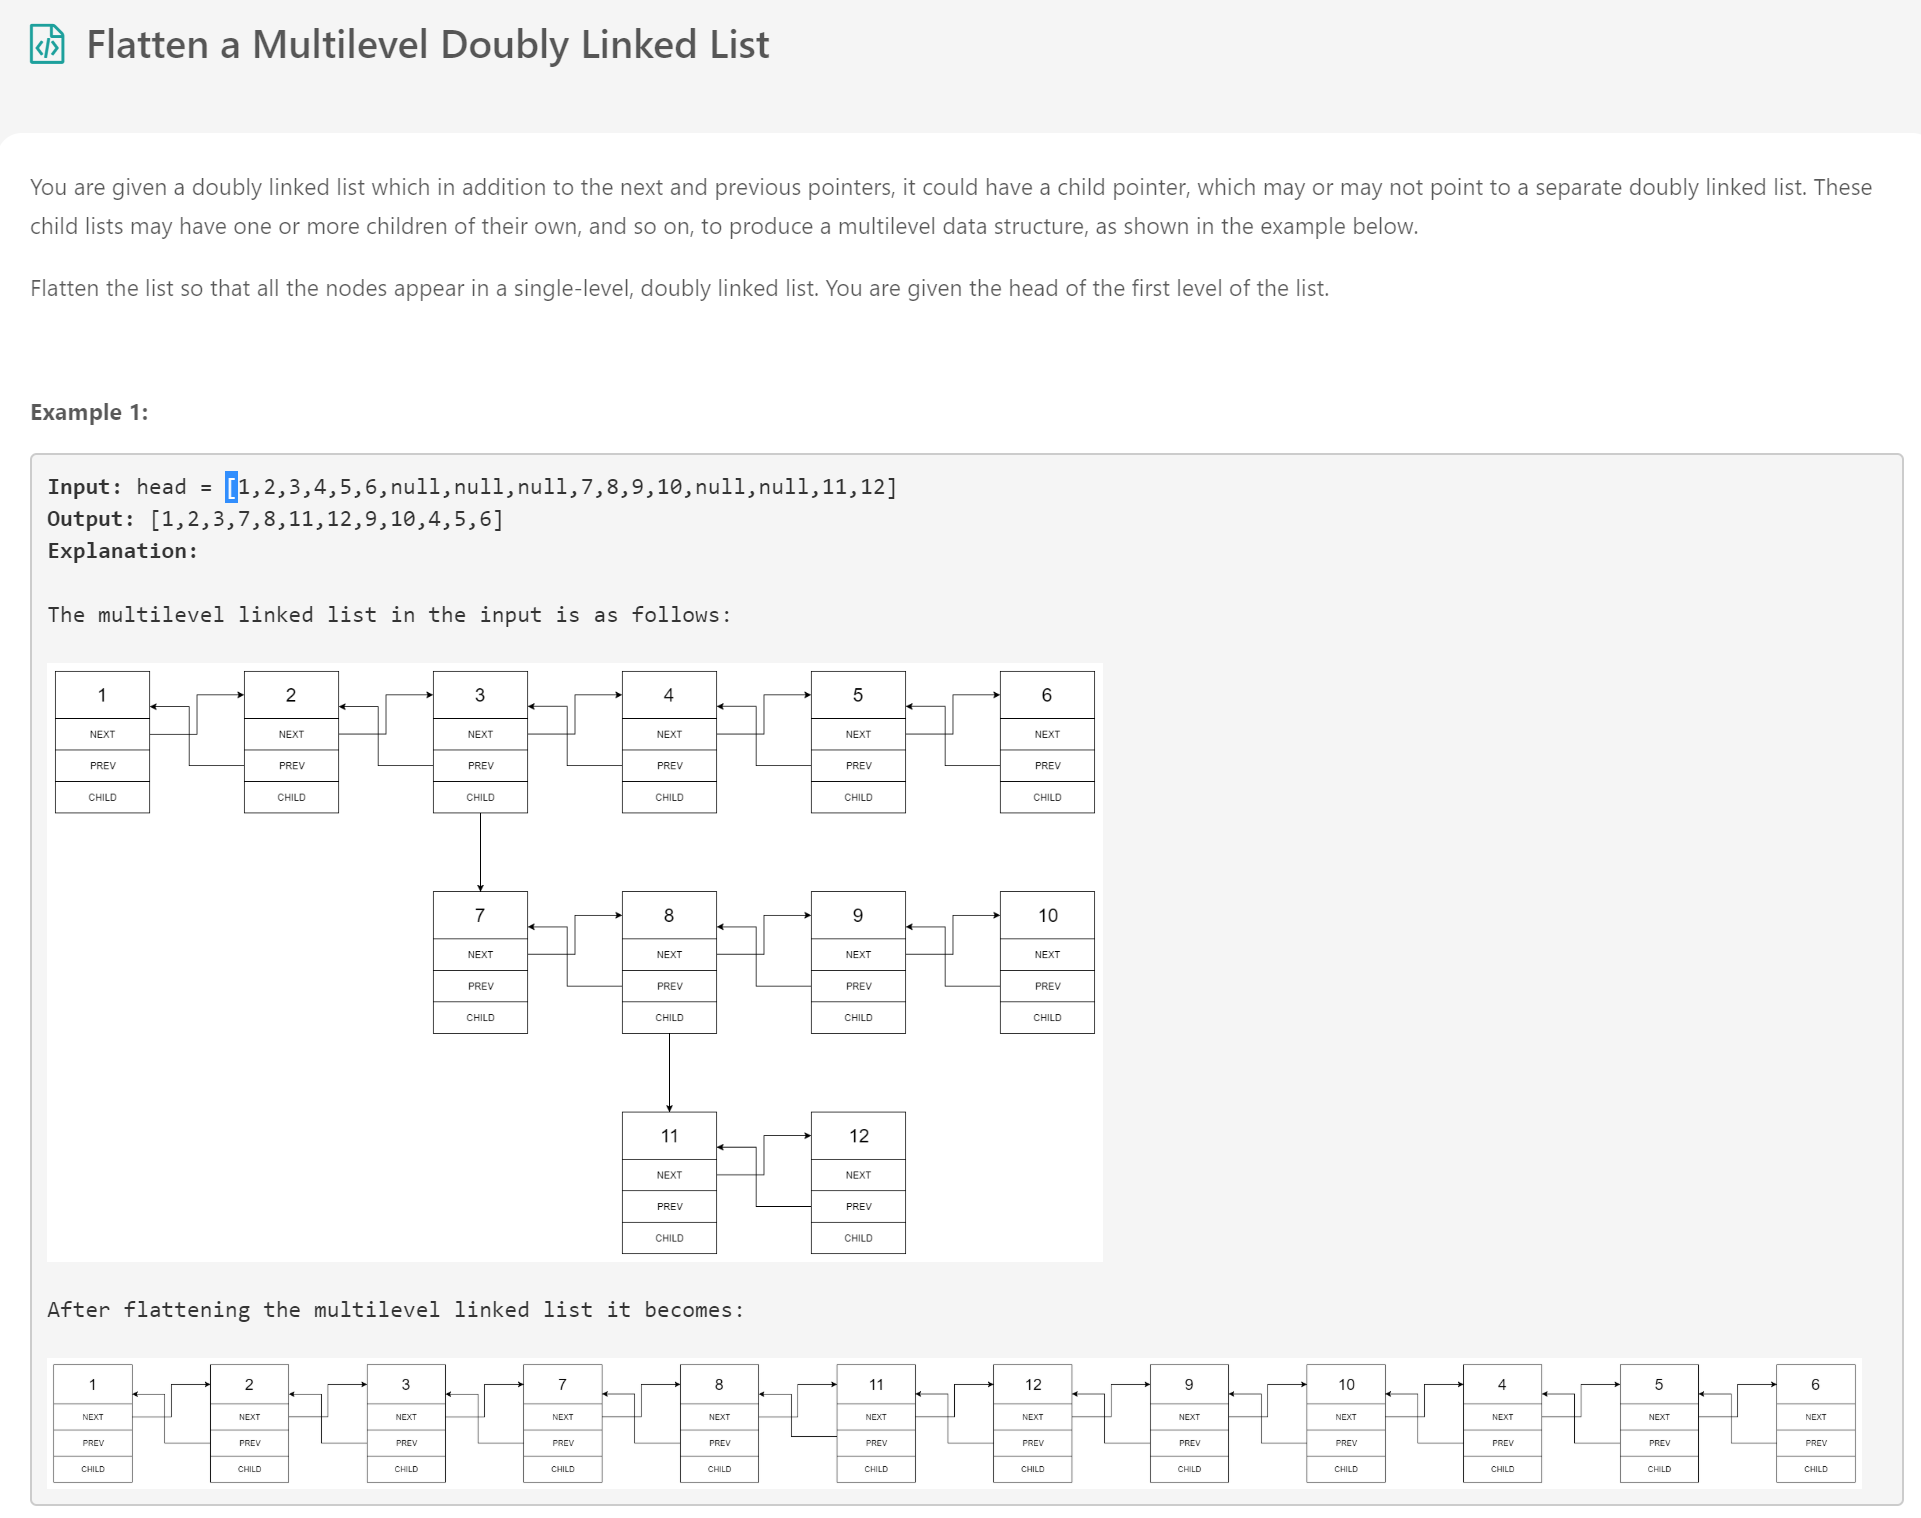

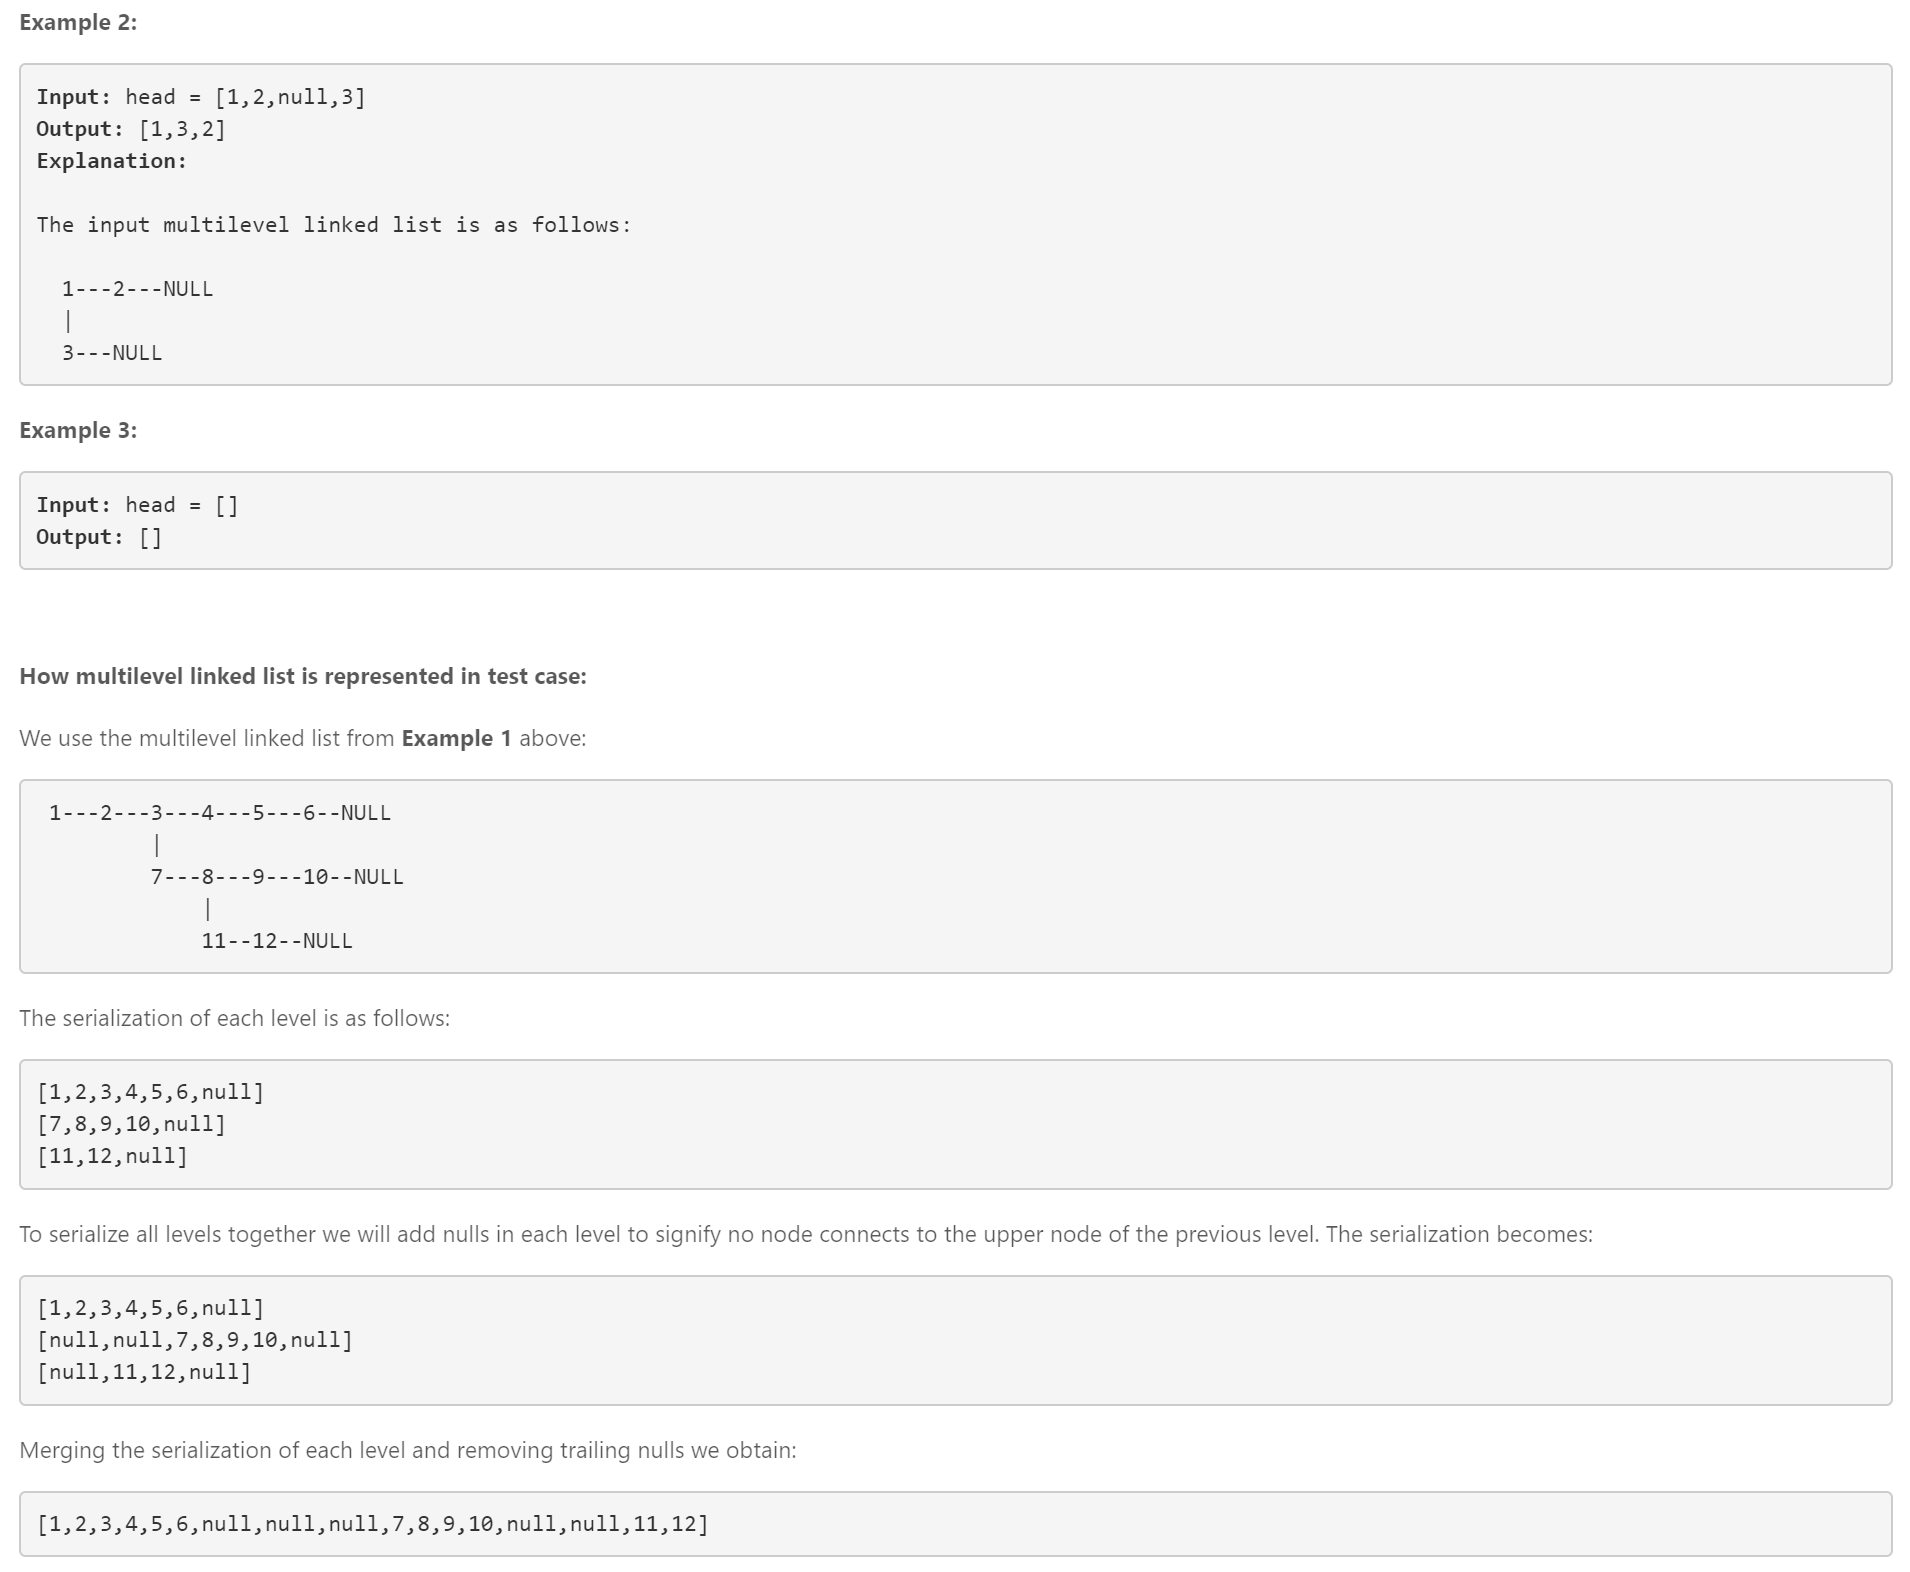

In [ ]:
''' July 10th Flatten a Multilevel Doubly Linked List
*** Need to review Linked List section ***
Constraints:
Number of Nodes will not exceed 1000.
1 <= Node.val <= 10^5
'''
# Solution : iterate a long the main list, inserting child lists, 
# Ensure links are in both directions and remove links to children,
# while flattening, 
# Time - O(n)
# Space -  O(n) 
"""
# Definition for a Node.
class Node:
    def __init__(self, val, prev, next, child):
        self.val = val
        self.prev = prev
        self.next = next
        self.child = child
"""

class Solution:
    def flatten(self, head: 'Node') -> 'Node':    
        # save the head to be returned 
        node = head 
        # iterate over the list 
        while node:
            if node.child: 
                # save the next so that we can link the tailed of 
                # the flatten child list later
                old_next = node.next
                # then insert the child flatten list to next node
                node.next = self.flatten(node.child)
                # link the child fatten list back to node
                node.next.prev = node
                # remove the child after being fattened out
                node.child = None

                while node.next:
                    node = node.next # link the tail of the child list
                    # and the saved old next node

                node.next = old_next 
                # linked back if old_next is not None 
                if old_next:
                    old_next.prev = node
                    
            # then now move to check the next node
            node = node.next

        return head


# fastest solution 
class Solution:
    def flatten(self, head: 'Node') -> 'Node':
        pointer = head
        branches = []
        while pointer:
            if pointer.child:
                if pointer.next: branches.append(pointer.next)
                pointer.next = pointer.child
                pointer.child = None
                pointer.next.prev = pointer
            elif not pointer.next and len(branches) > 0:
                pointer.next = branches.pop()
                pointer.next.prev = pointer
            pointer = pointer.next
        
        return head


# 2nd fastest solution : Using stack 
class Solution(object):

    def flatten(self, head):
        if not head:
            return head

        stack = []
        pseudo_head = Node(0, None, head, None)
        prev = pseudo_head
        stack.append(head)
        
        while stack:
            curr = stack.pop()
            prev.next = curr
            curr.prev = prev
            
            if curr.next:
                stack.append(curr.next)
            if curr.child:
                stack.append(curr.child)
                curr.child = None
            prev = curr
            head.prev = None
        return head

In [ ]:
''' July 11th   Subsets
Given a set of distinct integers, nums, return all possible subsets (the power set).
Note: The solution set must not contain duplicate subsets.

Example:
Input: nums = [1,2,3]
Output:
[
  [3],
  [1],
  [2],
  [1,2,3],
  [1,3],
  [2,3],
  [1,2],
  []
]

'''
# my solution using built-in combination func
class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:
        from itertools import combinations
        ret = [[]]
        for i in range(1,len(nums)+1):
            ret  += list(combinations(nums,i))
            
        return ret



# fastest solution using Cascading
class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:
        n = len(nums)
        output = [[]]
        
        for num in nums:
            output += [curr + [num] for curr in output]
        
        return output

# SHould checkout the backtracking and Lexicographic solutions
### Solution https://leetcode.com/articles/subsets/

In [ ]:
''' July 12th reverse bits 
Reverse bits of a given 32 bits unsigned integer.

Example 1:
Input: 00000010100101000001111010011100
Output: 00111001011110000010100101000000
Explanation: The input binary string 00000010100101000001111010011100 
represents the unsigned integer 43261596, 

so return 964176192 
which its binary representation is 00111001011110000010100101000000.

Example 2:
Input: 11111111111111111111111111111101
Output: 10111111111111111111111111111111
Explanation: 

The input binary string 11111111111111111111111111111101 
represents the unsigned integer 4294967293, 

so return 3221225471 
which its binary representation is 10111111111111111111111111111111.
 

Note:
Note that in some languages such as Java, there is no unsigned integer type. 
In this case, both input and output will be given as signed integer type and should not affect your implementation, 
as the internal binary representation of the integer is the same whether it is signed or unsigned.
In Java, the compiler represents the signed integers using 2's complement notation. 
Therefore, in Example 2 above the input represents the signed integer -3 and the output represents the signed integer -1073741825.
'''

# Solution link: https://leetcode.com/articles/reverse-bits/
class Solution:
    def reverseBits(self, n: int) -> int:
        result, mask = 0, 31
        while n:
            if n% 2 == 1:
                result += 2**mask
            mask -= 1
            n //= 2
        return result


# other solutions 
class Solution:
    def reverseBits(self, n: int) -> int:
        m = 0
        length = 0
        while n:
            m = m << 1
            m = m + (n & 1)
            n = n >> 1

            length += 1
            
        for i in range(32 - length):
            m <<= 1
        return m

# class Solution:
    # param n, an integer
    # return an integer
    def reverseBits(self, n):
        ret, power = 0, 24
        while n:
            ret += self.reverseByte(n & 0xff) << power
            n = n >> 8
            power -= 8
        return ret

    # memoization with decorator
    @functools.lru_cache(maxsize=256)
    def reverseByte(self, byte):
        return (byte * 0x0202020202 & 0x010884422010) % 1023

# fastest solution 
class Solution:

    # param n, an integer
    # return an integer
    def reverseBits(self, n):
        n = (n >> 16) | (n << 16)
        n = ((n & 0xff00ff00) >> 8) | ((n & 0x00ff00ff) << 8)
        n = ((n & 0xf0f0f0f0) >> 4) | ((n & 0x0f0f0f0f) << 4)
        n = ((n & 0xcccccccc) >> 2) | ((n & 0x33333333) << 2)
        n = ((n & 0xaaaaaaaa) >> 1) | ((n & 0x55555555) << 1)
        return n

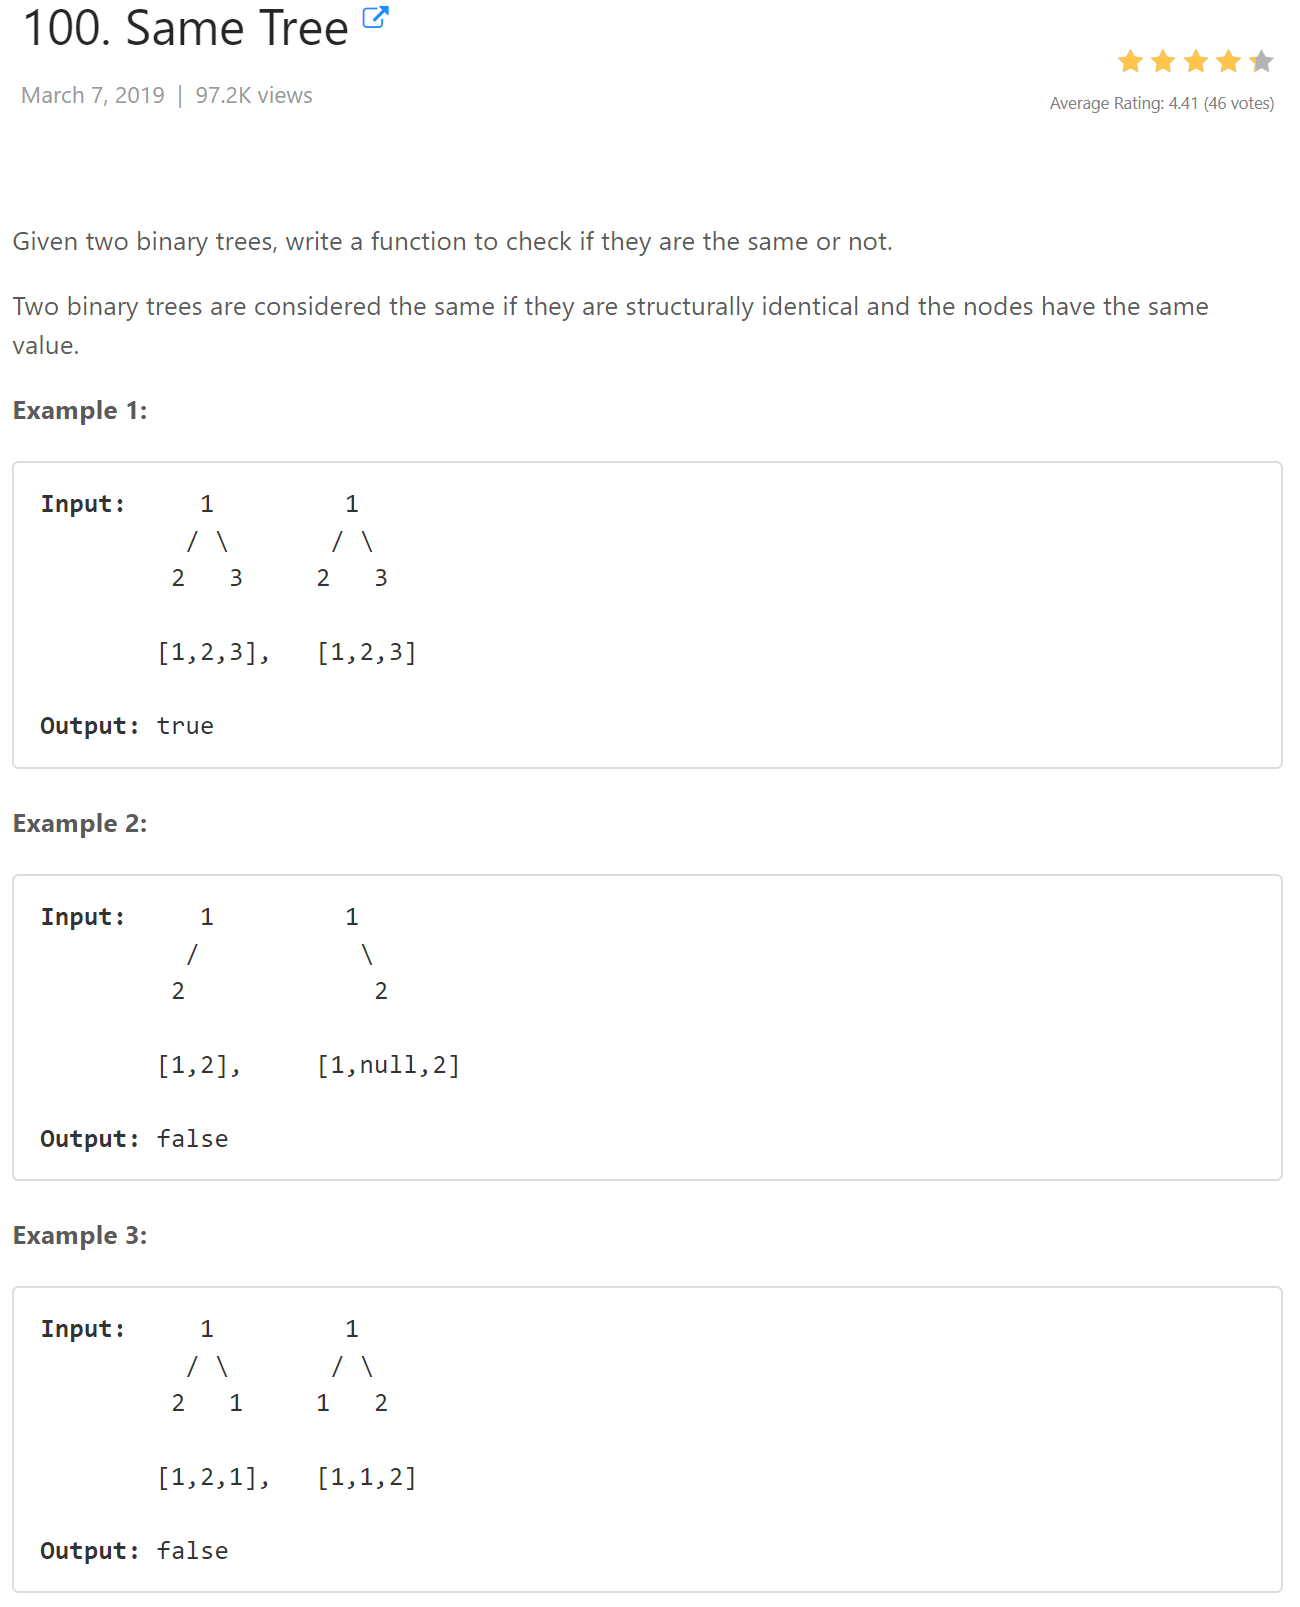

In [ ]:
''' July 13th Same Tree'''
# My solution is to recursion to get tree into a dict then compare 2 dicts
class Solution:
    def isSameTree(self, p: TreeNode, q: TreeNode) -> bool:
        dic1 = {}
        dic2 = {}
        
        def bfs(node : TreeNode, layer :int, dic: dict):
            if not node:
                return
            
            if layer in dic:
                dic[layer] += [node.val]
            else:
                dic[layer] = [node.val]
                
            if node.left:
                bfs(node.left,layer + 1,dic)
            else:
                dic[layer] += [-1]
                
            if node.right:
                bfs(node.right,layer + 1,dic)
            else:
                dic[layer] += [-2]
                
        bfs(p,0,dic1)
        bfs(q,0,dic2)
        return True if dic1 == dic2 else False

# Solution source: https://leetcode.com/articles/same-tree/

''' Approach 1: Recursion
Intuition
The simplest strategy here is to use recursion. 
Check if p and q nodes are not None, and their values are equal. 
If all checks are OK, do the same for the child nodes recursively.

Complexity Analysis

Time complexity: O(N), where N is a number of nodes in the tree, 
since one visits each node exactly once.

Space complexity :O(log(N) in the best case of completely balanced tree and 
O(N) in the worst case of completely unbalanced tree, to keep a recursion stack
'''

class Solution:
    def isSameTree(self, p, q):
        """
        :type p: TreeNode
        :type q: TreeNode
        :rtype: bool
        """    
        # p and q are both None
        if not p and not q:
            return True
        # one of p and q is None
        if not q or not p:
            return False
        if p.val != q.val:
            return False
        return self.isSameTree(p.right, q.right) and \
               self.isSameTree(p.left, q.left)

''' Approach 2: Iteration
Intuition
Start from the root and then at each iteration pop the current node out of the deque. 
Then do the same checks as in the approach 1 :

- p and p are not None,
- p.val is equal to q.val,
- and if checks are OK, push the child nodes.

Time complexity : O(N) since each node is visited exactly once.

Space complexity :O(log(N) in the best case of completely balanced tree and
O(N) in the worst case of completely unbalanced tree, to keep a deque.
'''
from collections import deque
class Solution:
    def isSameTree(self, p, q):
        """
        :type p: TreeNode
        :type q: TreeNode
        :rtype: bool
        """    
        def check(p, q):
            # if both are None
            if not p and not q:
                return True
            # one of p and q is None
            if not q or not p:
                return False
            if p.val != q.val:
                return False
            return True
        
        deq = deque([(p, q),])
        while deq:
            p, q = deq.popleft()
            if not check(p, q):
                return False
            
            if p:
                deq.append((p.left, q.left))
                deq.append((p.right, q.right))
                    
        return True



##### other comments

An easier and intuitive iterative solution (beats 100% both):
The idea is to store both the root values in a queue, and later dequeue both two compare them.

class Solution {
    public boolean isSameTree(TreeNode p, TreeNode q) {
        Queue<TreeNode> queue = new LinkedList<>();
        if (p == null && q == null)
            return true;
        else if (p == null || q == null)
            return false;
        if (p != null && q != null) {
            queue.offer(p);
            queue.offer(q);
        }
        while (!queue.isEmpty()) {
            TreeNode first = queue.poll();
            TreeNode second = queue.poll();
            if (first == null && second == null)
                continue;
            if (first == null || second == null)
                return false;
            if (first.val != second.val)
                return false;
            queue.offer(first.left);
            queue.offer(second.left);
            queue.offer(first.right);
            queue.offer(second.right);
        }
        return true;
    }
}

In [ ]:
''' july 14th Angle Between Hands of a Clock
Given two numbers, hour and minutes. Return the smaller angle (in degrees) 
formed between the hour and the minute hand.

Input: hour = 12, minutes = 30
Output: 165

Input: hour = 3, minutes = 30
Output: 75

Input: hour = 3, minutes = 15
Output: 7.5

Input: hour = 4, minutes = 50
Output: 155

Input: hour = 12, minutes = 0
Output: 0
'''
# my solution 
class Solution:
    def angleClock(self, hour: int, minutes: int) -> float:
        if (hour == 12): 
            hour = 0
            
        h_angle = 360/12 * hour + 360/12/60 * minutes
        m_angle = 360/60 * minutes
        
        ret = abs(h_angle - m_angle)
        
        return ret if ret <= 180 else 360 - ret

# fastest solution , calculated angle for min and hour beforehand 
class Solution:
    def angleClock(self, hour: int, minutes: int) -> float:
        # divide minutes by 5
        # difference of numbers 6 apart (180)
        # difference of 3 apart (90)
        # therefore, difference of 1 apart is 30
        # 1 is 30, 2 is 60, 3 is 90, 4 is 120, 5 is 150, 6 is 180, 7 is 150 ..
        
        # calculate minute angle (minutes * 6)
        minuteAngle = float(minutes * 6)
        hourAngle = (float(hour % 12) * 30.0) + (minutes * 0.5)
        diffAngle = max(hourAngle, minuteAngle) - min(hourAngle, minuteAngle)
        if diffAngle <= 180.0:
            return max(hourAngle, minuteAngle) - min(hourAngle, minuteAngle) 
        else:
            return 360 - diffAngle


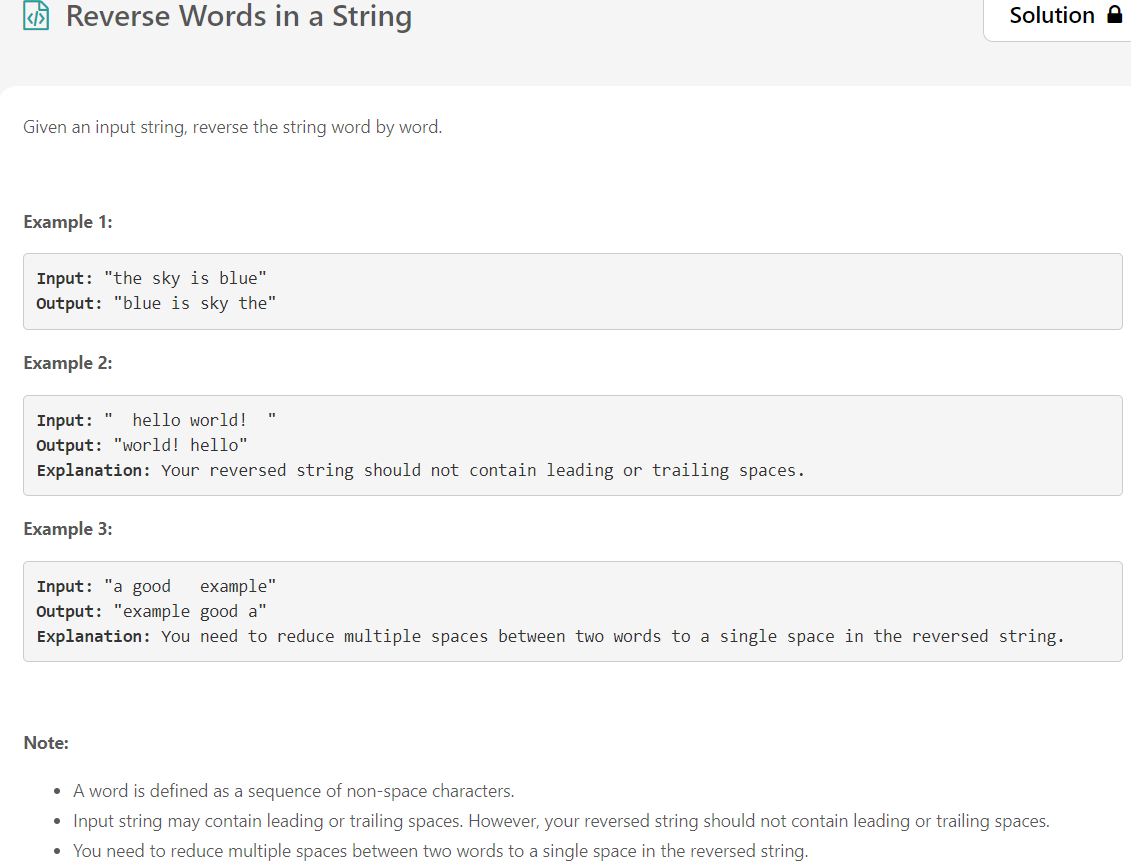

In [ ]:
''' July 15th Reverse Words in a String '''
# 1. split() you data and take elements in negative order. 
# split() is smart enough to ignore several spaces in a row as well as extra spaces in the begin and in the end.
# Complexity: both time and memory complexity is O(n), because we traverse all string and we create new with size O(n)
class Solution:
    def reverseWords(self, s):
        return " ".join(s.split()[::-1]) 



#2. Futher discussion: We can not do better than O(n) space in python, because strings are immutable. 
# However if we are given not string, but array of symbols, we can remove all extra spaces, 
# using Two pointers approach, reverse full string and then reverse each word. 
# Time complexity will be O(n) and space will be O(1).

# Steps : 
# 1 - We traverse chars with two pointers and rewrite symbols in the beginning.
# 2 - Cut our chars, removing last elements (in my code it is not really inplace, but you can use del to do it in place)
# 3 - Reverse list using chars.reverse().
# 4 - Use two pointers to reverse each word.

class Solution:
    def reverseWords(self, s):       
        chars = [t for t in s]
        slow, n = 0, len(s)
        for fast in range(n):
            if chars[fast] != " " or (fast > 0 and chars[fast] == " " and chars[fast-1] != " "):
                chars[slow] = chars[fast]
                slow += 1
                
        if slow == 0: return ""       
        chars = chars[:slow-1] if chars[-1] == " " else chars[:slow]
        chars.reverse()
        
        slow, m = 0, len(chars)
        for fast in range(m + 1):
            if fast == m or chars[fast] == " ":
                chars[slow:fast] = chars[slow:fast][::-1]
                slow = fast + 1
                
        return "".join(chars)